# Survival function with censored data

In this notebook we will explore how not dealing with censored data correctly can lead to bias (in this example, a systematic underestimation of the expected lifetime).

In order to do this, consider the ages of 100 vampires who were "born" (i.e. turned into a vampire) between the years 1400 and 2018.

## Terminology

- _born_: in this context we will mean "turned into a vampire"
- _undead_: the state of being "alive" as a vampire, so after they were turned, but before they were permanently killed
- _died_: for a vampire, we mean that they were killed permanently, e.g. by exposure to sun rays, burning, stake to the heart, or any other way a vampire can die
- _age_: the number of years since a vampire was turned
- _lifetime_ or _age at time of death_: the age a vampire had when they died
- _censored lifetime_: this can be their age at time of death if they have already died, but if they are still undead, it is their current age

In [60]:
import numpy as np
import lifelines

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [52]:
start_year = 1400
current_year = 2018
number_of_vampires = 100

## We have more data from vampires born recently

This can be because of a population increase, or because data collection has improved.

In [53]:
birth_dates_increasing = map(int, np.random.triangular(
    start_year, current_year, current_year, size=number_of_vampires))

/Users/marianne/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'frequency')

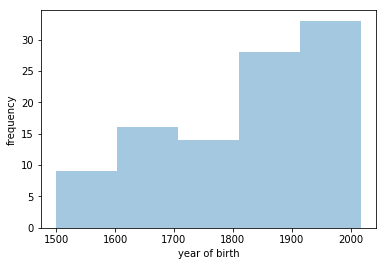

In [63]:
sns.distplot(birth_dates_increasing, kde=False, label='histogram of vampires born in each year')
plt.xlabel('year of birth')
plt.ylabel('frequency')

## We know all their ages at time of death - even if they haven't died yet (asked a clairvoyant)

In [64]:
# Their theoretical average age is 500 years
# this is the mean of the distribution we will draw their final ages from
theoretical_average_age = 500

true_ages_at_time_of_death = map(int, np.random.exponential(
    theoretical_average_age, size=number_of_vampires))

/Users/marianne/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'frequency')

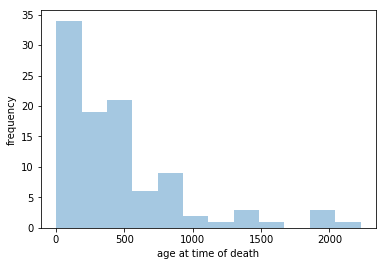

In [65]:
sns.distplot(true_ages_at_time_of_death, kde=False)
plt.xlabel('age at time of death')
plt.ylabel('frequency')

## Censored data has a different distribution from the actual lifetimes

If the year a vampire will die lies in the future (currently meaning after 2018), we could not know without asking a clairvoyant how old the vampire will be when they die. We only know they will be _at least_ the age they are now. We will therefore use their current age, and record the fact that their age at time of death is _censored_.

In [71]:
def year_of_death(year_of_birth, age_at_time_of_death):
    return year_of_birth + age_at_time_of_death

def censored_age(birth_year, age_at_time_of_death):
    death_year = year_of_death(birth_year, age_at_time_of_death)
    
    return (age_at_time_of_death if (death_year <= 2018)
            else (2018 - birth_year))

In [74]:
# Having a set of data from each vampire: birth year and age at time of death, we know what the
# year is in which they die. If this year lies in the future, we know we could not have observed it
# without a clairvoyant, so we replace the age with their current age.
ages_with_censoring = map(lambda x: censored_age(x[0], x[1]),
                    zip(birth_dates_increasing, true_ages_at_time_of_death))

# We mark an age as 'observed' if the age with censoring is equal to the true age at time of death
# 'observed' is exactly the opposite of 'censored'
# (if a data point is observed, it is not censored, and vice versa)
observed = map(lambda x: x[0] == x[1], zip(ages_with_censoring, true_ages_at_time_of_death))

/Users/marianne/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/marianne/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


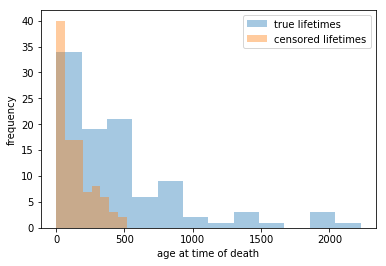

In [80]:
sns.distplot(true_ages_at_time_of_death, kde=False, label='true lifetimes')
sns.distplot(censored_ages, kde=False, label='censored lifetimes')
plt.xlabel('age at time of death')
plt.ylabel('frequency')
plt.legend();

We can see that the distribution of censored lifetimes differs significantly from the true distribution (which one would only know if they could look into the future).


In [ ]:
birth_dates_random = map(int, np.random.uniform(1400, 2018, size=n_obs))
ages_uniform = [censored_age(age, offset, censoring_time) for age, offset in zip(exp_vars, birth_dates_random)]
observed_uniform = [age == uncensored_age for age, uncensored_age in zip(ages_uniform, exp_vars)]

birth_dates_increasing = map(int, np.random.triangular(1400, 2018, 2018, size=n_obs))
ages_increasing_data = [censored_age(age, offset, censoring_time) for age, offset in zip(exp_vars, birth_dates_increasing)]
observed_increasing_data = [age == uncensored_age for age, uncensored_age in zip(ages_increasing_data, exp_vars)]


ages_increasing_data_observed = [age for i, age in enumerate(ages_increasing_data) if observed_increasing_data[i]]

In [30]:
km = lifelines.KaplanMeierFitter()

Text(0.5,0,'age (centuries)')

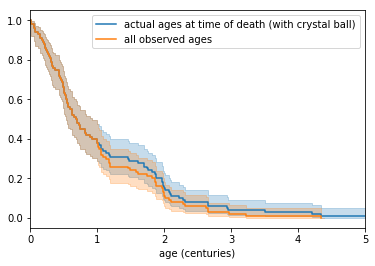

In [40]:
km.fit(exp_vars, np.ones(n_obs), label='actual ages at time of death (with crystal ball)')
ax = km.plot()

km.fit(ages_increasing_data, np.ones(n_obs), label='all observed ages')
plot = km.plot(ax=ax)

plot.set_xlim(0, 5)
plot.set_xlabel('age (centuries)')


Text(0.5,0,'age (centuries)')

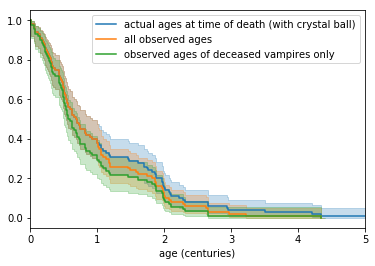

In [39]:
km.fit(exp_vars, np.ones(n_obs), label='actual ages at time of death (with crystal ball)')
ax = km.plot()

km.fit(ages_increasing_data, np.ones(n_obs), label='all observed ages')
ax2 = km.plot(ax=ax)

km.fit(ages_increasing_data_observed, np.ones_like(ages_increasing_data_observed), label='observed ages of deceased vampires only')
plot = km.plot(ax=ax2)

plot.set_xlim(0, 5)
plot.set_xlabel('age (centuries)')

Text(0.5,0,'age (centuries)')

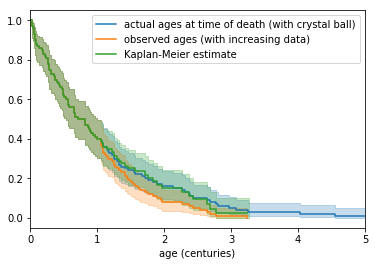

In [34]:
km.fit(exp_vars, np.ones(n_obs), label='actual ages at time of death (with crystal ball)')
ax = km.plot()

km.fit(ages_increasing_data, np.ones(n_obs), label='observed ages (with increasing data)')
ax2 = km.plot(ax=ax)

km.fit(ages_increasing_data, observed_increasing_data, label='Kaplan-Meier estimate')
plot = km.plot(ax=ax2)

plot.set_xlim(0, 5)
plot.set_xlabel('age (centuries)')